In [ ]:
#dropbox app name = psilentpDBApp
#app key  = huwh623mjoj73d1
#app secret key = npkg5vdpu9n4v0t


In [1]:
# Include the Dropbox SDK
from dropbox import client, rest, session

# Get your app key and secret from the Dropbox developer website
app_key = 'huwh623mjoj73d1'
app_secret = 'npkg5vdpu9n4v0t'

# ACCESS_TYPE should be 'dropbox' or 'app_folder' as configured for your app
ACCESS_TYPE = 'dropbox'

sess = session.DropboxSession(app_key,app_secret, ACCESS_TYPE )

request_token = sess.obtain_request_token()

# Make the user sign in and authorize this token
url = sess.build_authorize_url(request_token)
print "url:", url
print "Please authorize in the browser.

AttributeError: 'module' object has no attribute 'DropboxOAuth2FlowNoRedirect'

In [7]:
# This will fail if the user didn't visit the above URL and hit 'Allow'
access_token = sess.obtain_access_token(request_token)
client = client.DropboxClient(sess)
print "linked account:", client.account_info()

linked account: {u'referral_link': u'https://db.tt/yvhIjuYv', u'display_name': u'Theodore Lindsay', u'uid': 14340904, u'locale': u'en', u'email_verified': True, u'email': u'thlindsay1@gmail.com', u'is_paired': True, u'team': None, u'name_details': {u'familiar_name': u'Theodore', u'surname': u'Lindsay', u'given_name': u'Theodore'}, u'country': u'US', u'quota_info': {u'datastores': 0, u'shared': 17749649693, u'quota': 1106759385088, u'normal': 16297266385}}


In [16]:
folder_metadata = client.metadata('/lindsay_share/song')

In [17]:
paths = [item['path'] for item in folder_metadata['contents']]

In [18]:
paths

[u'/lindsay_share/song/2016_03_10_0000.abf',
 u'/lindsay_share/song/2016_03_11_0001.abf']

In [67]:
f,metadata = client.get_file_and_metadata(paths[1])

In [68]:
out = open('temp_abf.abf', 'wb')
out.write(f.read())

In [69]:
import neo

In [70]:
axio = neo.AxonIO('temp_abf.abf')

In [73]:
datafile = axio.read()

In [78]:
song = datafile[0].segments[0].analogsignals[0]

In [84]:
%pylab inline
%config InlineBackend.figure_format = 'png'
import pylab as plb
plb.rcParams['pdf.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


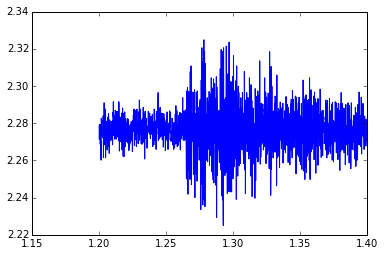

In [107]:
plot(song.times[12000:14000],song[12000:14000])

In [88]:
from scipy.io import wavfile

In [97]:
wavfile.write('testwav.wav',song.sampling_rate,song*10.0)